# Assignment 2
## Draft-Fuqi Guan

**Task 1.1**

$s^T\Sigma= [s_{1},s_{2},\cdots,s_{p}]\bullet \left[\begin{matrix}\sigma_{11}&0&0&...&0\\
                                                            0&\sigma_{22}&0&...&0\\
                                                            \vdots & \vdots & \ddots & \vdots \\
                                                            0&0&\cdots&\sigma_{pp}&0\end{matrix}\right]$
$=\left[
\begin{matrix}
s_1\sigma_{11}&s_2\sigma_{22}&s_3\sigma_{33}&\cdots&s_p\sigma_{pp}&0&\cdots&0
\end{matrix}
\right]$  
  
  
$\Rightarrow s^T\Sigma\Sigma^Ts=\sum_{i=1}^{i=p}{s_i\sigma_{ii}}^2, with\  \Arrowvert s \Arrowvert=1$  

$Since\ \sigma_{11}>\sigma_{22}>...>\sigma_{pp},$  

$ \hat s = {[1,0,0,0,...,0]}^T $


**Task 1.2**


***Idea***: *Using $u$ as basis， then this problem would be simular to the first one.*  

*The coordinate vector of c in basis u:* $\xi$  
Then, $a=u\bullet \xi,\ \parallel a \parallel = \sqrt{\xi_1^2u_1^2+\cdots+\xi_p^2u_p^2},\ with \parallel u_i \parallel = 1, \parallel a \parallel = \parallel \xi \parallel$  
  
$\ \ \ \ \Rightarrow a^TXX^Ta=\xi^T u^T  u  \Sigma  V^T  V  \Sigma^T  u^T  u  \xi=\xi^T\bullet\Sigma\bullet\Sigma^T\bullet\xi$  
  
According to task 1.1:$\ \ \ $ $\xi = [1,0,\cdots,0]^T,$    
$\ a=u\bullet\xi=u_1$

**Task 2**

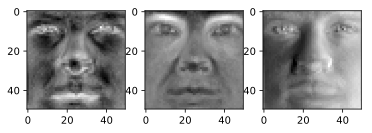

In [6]:
import numpy as np 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt 
import os

path_0 = "C:/Users/fuqi Guan/Desktop/MasterCode/INFO_local/Ass2/task2_data/yaleBfaces/subset0/"

def samplematrix(path):
    fotos = os.listdir(path)
    fotos.sort() # Fix bug under Mac OS
    S = np.empty([2500,len(fotos)])
    j=0
    for i in fotos:        
        foto_matrix = mpimg.imread(path+i)
        foto_vector = np.ravel(foto_matrix)
        S[:,j]=foto_vector.T
        j = j + 1
    return S

#print(samplematrix(path_0).shape)



def first20pc(X):
    mean = X.mean(1)
    for i in range(X.shape[1]):
        X[:,i] = X[:,i] - mean
    u,s,v = np.linalg.svd(X)
    u_k = u[:,0:20]
    return u_k
def centerize(X):
    mean = X.mean(1)
    for i in range(X.shape[1]):
        X[:,i] = X[:,i] - mean
    return X

'''
Task 2.1
'''
T = samplematrix(path_0) #Sample of Trainingdata
u_train = first20pc(T)
%matplotlib inline
plt.subplots(1,3)
plt.subplot(1,3,1)
plt.imshow(u_train[:,0].reshape((50,50)),cmap='gray')
plt.subplot(1,3,2)
plt.imshow(u_train[:,1].reshape((50,50)),cmap='gray')
plt.subplot(1,3,3)
plt.imshow(u_train[:,2].reshape((50,50)),cmap='gray')
plt.show()

#End Task2.1


k=20, Subset1's error rate is 4.17%
k=20, Subset2's error rate is 21.67%
k=20, Subset3's error rate is 69.29%
k=20, Subset4's error rate is 86.84%


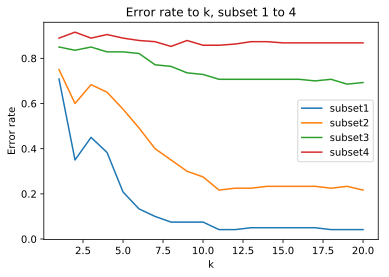

In [10]:
path_1 = 'C:/Users/fuqi Guan/Desktop/MasterCode/INFO_local/Ass2/task2_data/yaleBfaces/subset1/'
path_2 = 'C:/Users/fuqi Guan/Desktop/MasterCode/INFO_local/Ass2/task2_data/yaleBfaces/subset2/'
path_3 = 'C:/Users/fuqi Guan/Desktop/MasterCode/INFO_local/Ass2/task2_data/yaleBfaces/subset3/'
path_4 = 'C:/Users/fuqi Guan/Desktop/MasterCode/INFO_local/Ass2/task2_data/yaleBfaces/subset4/'
S_1 = samplematrix(path_1)
S_2 = samplematrix(path_2)
S_3 = samplematrix(path_3)
S_4 = samplematrix(path_4)
labelx = list(range(1,11))
label0 = np.repeat(labelx,7)
label1 = np.repeat(labelx,12)
label2 = np.repeat(labelx,12)
label3 = np.repeat(labelx,14)
label4 = np.repeat(labelx,19)

def test_identify(train,l_train,test,l_test,start,k):
    right = 0
    u_train = first20pc(train)
    p_train = u_train[:,start:k].T
    #print(p_train.shape)
    ctrain = centerize(train)
    reduced_train = np.matmul(p_train,ctrain)
    #u_test = first20pc(test)
    #p_test = u_test[:,0:k+1].T
    ctest = centerize(test)
    reduced_test = np.matmul(p_train,ctest)
    for i in range(reduced_test.shape[1]):
        a = find_3_neighbour(reduced_test[:,i],reduced_train,l_train)
        if a == l_test[i]:
            right = right + 1
    return right


def find_3_neighbour(vec,train_matrix,train_label):
    distance_list = np.empty((1,train_matrix.shape[1]))
    for i in range(train_matrix.shape[1]):
        distance_list[0,i] = np.linalg.norm(vec-train_matrix[:,i])
    ordered = np.argsort(distance_list)
    list_3 = [0,0,0]
    for j in range(3):
        list_3[j]=train_label[ordered[0,j]]       
    b = np.bincount(list_3)
    c = np.argmax(b)
    return c

'''
Task 2.2
'''
error_rate_list = []
for k in range(1,21):
    right = test_identify(T,label0,S_1,label1,0,k)
    error_rate = 1-right/(label1.shape[0])
    error_rate_list.append(error_rate)
print("k=20, Subset1's error rate is {:.2%}".format(error_rate_list[19]))
plt.plot(range(1,21),error_rate_list)
error_rate_list = []
for k in range(1,21):
    right = test_identify(T,label0,S_2,label2,0,k)
    error_rate = 1-right/(label2.shape[0])
    error_rate_list.append(error_rate)
print("k=20, Subset2's error rate is {:.2%}".format(error_rate_list[19]))
plt.plot(range(1,21),error_rate_list)
error_rate_list = []
for k in range(1,21):
    right = test_identify(T,label0,S_3,label3,0,k)
    error_rate = 1-right/(label3.shape[0])
    error_rate_list.append(error_rate)
print("k=20, Subset3's error rate is {:.2%}".format(error_rate_list[19]))
plt.plot(range(1,21),error_rate_list)
error_rate_list = []
for k in range(1,21):
    right = test_identify(T,label0,S_4,label4,0,k)
    error_rate = 1-right/(label4.shape[0])
    error_rate_list.append(error_rate)
print("k=20, Subset4's error rate is {:.2%}".format(error_rate_list[19]))
plt.plot(range(1,21),error_rate_list)
plt.title('Error rate to k, subset 1 to 4')
plt.xlabel('k')
plt.ylabel('Error rate')
plt.legend(("subset1",
        "subset2",
        "subset3",
        "subset4")
       )
plt.show()
#end of task 2.2

k=17, Subset1's error rate is 3.33%
k=17, Subset2's error rate is 22.50%
k=17, Subset3's error rate is 55.71%
k=17, Subset4's error rate is 87.37%


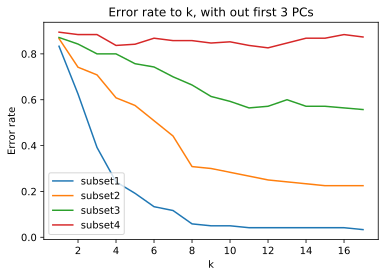

In [12]:
'''
Task 2.3
'''
error_rate_list = []
for k in range(4,21):
    right = test_identify(T,label0,S_1,label1,3,k)
    error_rate = 1-right/(label1.shape[0])
    error_rate_list.append(error_rate)
print("k=17, Subset1's error rate is {:.2%}".format(error_rate_list[16]))
plt.plot(range(1,18),error_rate_list)
error_rate_list = []
for k in range(4,21):
    right = test_identify(T,label0,S_2,label2,3,k)
    error_rate = 1-right/(label2.shape[0])
    error_rate_list.append(error_rate)
print("k=17, Subset2's error rate is {:.2%}".format(error_rate_list[16]))
plt.plot(range(1,18),error_rate_list)
error_rate_list = []
for k in range(4,21):
    right = test_identify(T,label0,S_3,label3,3,k)
    error_rate = 1-right/(label3.shape[0])
    error_rate_list.append(error_rate)
print("k=17, Subset3's error rate is {:.2%}".format(error_rate_list[16]))
plt.plot(range(1,18),error_rate_list)
error_rate_list = []
for k in range(4,21):
    right = test_identify(T,label0,S_4,label4,3,k)
    error_rate = 1-right/(label4.shape[0])
    error_rate_list.append(error_rate)
print("k=17, Subset4's error rate is {:.2%}".format(error_rate_list[16]))
plt.plot(range(1,18),error_rate_list)
plt.title('Error rate to k, with out first 3 PCs')
plt.xlabel('k')
plt.ylabel('Error rate')
plt.legend(("subset1",
        "subset2",
        "subset3",
        "subset4")
       )
plt.show()
#end of task 2.3

My guess would be: the last 17 PCs can represent more difference of each subset. <span style="color:red"> *Not sure about this answer.* </span>